### We want to illustrate how a kernel function operates. We make use of a dual cost function that operate on operate on a dot-products of examples with minimal dataset

In [2]:
import numpy as np

X = np.array([[1, 2, 3], [3, 2, 1]])
def poly_expansion(A):
    return np.array([[x**y for y in 
                     row for x in row] for row in A])

poly_X = poly_expansion(X)
print('Dimensions after expanding: %s'
     % str(poly_X.shape))
print(poly_X)

Dimensions after expanding: (2, 9)
[[ 1  2  3  1  4  9  1  8 27]
 [27  8  1  9  4  1  3  2  1]]


In [3]:
np.dot(poly_X[0], poly_X[1])

126

###### We use the kernel function and call it on the two features.

In [4]:
def poly_kernel(a, b):
    return np.sum(a*b)**2

poly_kernel(X[0], X[1])

100

### We work with more complex problem. This section demonstrates a handwritten recognition task and solves the atsk using a nonlinear kernel the RBF. Which learns from the digits dataset available from the module datasets in sklearn.

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import load_digits
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV

import random

In [5]:
digits = load_digits()
X, y = digits.data, digits.target

##### The code below is aim to display few of the images 

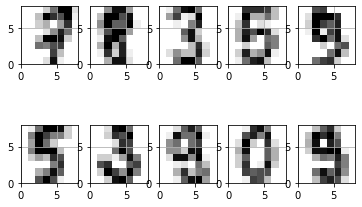

In [6]:
%matplotlib inline
random_examples = [random.randint(0, len(digits.images))
                  for i in range(10)]
for n, num in enumerate(random_examples):
    plt.subplot(2, 5, n+1)
    plt.imshow(digits.images[num], cmap='binary',
              interpolation='none', extent=[0,8,0,8])
    plt.grid()
plt.show()

#### let fit the svm with a nonlinear kernel and use the accuracy score to check the usefulness of the svm representation

In [8]:
#We keep %30 random example for test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.3, random_state=101)

# Here, is where the scaling takes place
scaling = MinMaxScaler(feature_range=(-1, 1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [9]:
from sklearn.svm import SVC
svm = SVC()

cv_performance = cross_val_score(svm, X_train, y_train,
                                cv=10)

test_performance = svm.fit(X_train, y_train).score(X_test,
                                                  y_test)

In [10]:
print('Cross-validation accuracy score: %0.3f,'
     'test accuracy score: %0.3f'
     % (np.mean(cv_performance), test_performance))

Cross-validation accuracy score: 0.986,test accuracy score: 0.987


In [11]:
learning_algo = SVC(kernel='linear', random_state=101)
search_space = [{'kernel': ['linear'],
                  'C':np.logspace(-3, 3, 7)},
                 {'kernel': ['rbf'],
                 'C':np.logspace(-3, 3, 7),
                 'gamma': np.logspace(-3, 2, 6)}]

gridsearch = GridSearchCV(learning_algo,
                         param_grid=search_space,
                         refit=True, cv=10)

gridsearch.fit(X_train, y_train)
print('Best parameter: %s'
     % str(gridsearch.best_params_))
cv_performance = gridsearch.best_score_
test_performance = gridsearch.score(X_test, y_test)

print('Cross-validation accuracy score: %0.3f,'
     ' test accuracy score: %0.3f'
     % (cv_performance, test_performance))

Best parameter: {'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}
Cross-validation accuracy score: 0.988, test accuracy score: 0.987


#### Let's show the number of wrongly predicted times of the SVM attempt

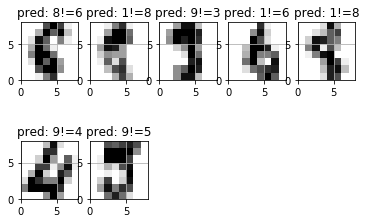

In [13]:
prediction = gridsearch.predict(X_test)
wrong_prediction = (prediction!=y_test)
test_digit = scaling.inverse_transform(X_test)
for n, (num, yp, yt) in enumerate(zip(
    scaling.inverse_transform(X_test)[wrong_prediction],
    prediction[wrong_prediction],
        y_test[wrong_prediction])):
    plt.subplot(2, 5, n+1)
    plt.imshow(num.reshape((8,8)), cmap='binary',
            interpolation='none',
            extent=[0,8,0,8])
    plt.title('pred: '+str(yp)+"!="+str(yt))
    plt.grid()
plt.show()